In [1]:
import datadotworld as dw
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
dataset = 'finance/us-stocks-fundamentals-xbrl'

In [2]:
dataset= 'finance/us-stocks-fundamentals-xbrl'
stock_fundamentals = dw.load_dataset(dataset)
stock_fundamentals.dataframes

LazyLoadedDict({'companies': LazyLoadedValue(<pandas.DataFrame>), 'companies_2': LazyLoadedValue(<pandas.DataFrame>), 'indicators_by_company': LazyLoadedValue(<pandas.DataFrame>)})

In [3]:
companies_table = stock_fundamentals.tables['companies']
companies_table[0]

OrderedDict([('company_id', 1000045),
             ('name_latest', 'Nicholas Financial Inc'),
             ('names_previous', None)])

In [4]:
stock_fundamentals.describe('companies')

{'name': 'companies',
 'schema': {'fields': [{'name': 'company_id',
    'title': 'company_id',
    'type': 'integer',
    'rdfType': 'http://www.w3.org/2001/XMLSchema#integer',
    'dwSourceId': 'company_id'},
   {'name': 'name_latest',
    'title': 'name_latest',
    'type': 'string',
    'rdfType': 'http://www.w3.org/2001/XMLSchema#string',
    'dwSourceId': 'name_latest'},
   {'name': 'names_previous',
    'title': 'names_previous',
    'type': 'string',
    'rdfType': 'http://www.w3.org/2001/XMLSchema#string',
    'dwSourceId': 'names_previous'}]},
 'path': 'data/companies.csv',
 'format': 'csv',
 'profile': 'data-resource',
 'encoding': 'utf-8'}

In [5]:
dw.query(dataset, "SELECT * FROM companies LIMIT 10").dataframe

,company_id,name_latest,names_previous
0,1000045,Nicholas Financial Inc,None
1,1000180,Sandisk Corp,None
2,1000209,Medallion Financial Corp,None
3,1000228,Henry Schein Inc,None
4,1000229,Core Laboratories N V,None
5,1000230,Optical Cable Corp,None
6,1000232,Kentucky Bancshares Inc /KY/,None
7,1000278,Pacifichealth Laboratories Inc,None
8,1000298,Impac Mortgage Holdings Inc,None
9,1000459,Green Energy Group Inc.,None


In [7]:
dw.query(dataset, "SELECT * FROM indicators_by_company LIMIT 10").dataframe

,company_id,indicator_id,2010,2011,2012,2013,2014,2015,2016
0,1000045,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,None,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0,None
1,1000045,AccumulatedDepreciationDepletionAndAmortizatio...,None,NaN,2111343.0,2242703.0,2236449.0,2462000.0,None
2,1000045,AdjustmentForAmortization,None,NaN,-11482251.0,-13490892.0,-13852305.0,-13811000.0,None
3,1000045,Assets,None,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0,None
4,1000045,AssetsHeldForSaleAtCarryingValue,None,1373001.0,1203664.0,1696330.0,NaN,NaN,None
5,1000045,AssetsOfDisposalGroupIncludingDiscontinuedOper...,None,NaN,NaN,NaN,1746887.0,2148000.0,None
6,1000045,Cash,None,2803054.0,2797716.0,2635036.0,3388193.0,1849000.0,None
7,1000045,CashAndCashEquivalentsAtCarryingValue,None,2803054.0,2797716.0,NaN,NaN,NaN,None
8,1000045,CashAndCashEquivalentsPeriodIncreaseDecrease,None,785514.0,-5338.0,NaN,NaN,NaN,None
9,1000045,CashPeriodIncreaseDecrease,None,NaN,NaN,-162680.0,753157.0,-1539000.0,None


In [8]:
dw.query(dataset,"SELECT COUNT(*) FROM companies").dataframe

,count
0,12173


In [9]:
dw.query(dataset,"SELECT COUNT(*) FROM companies_2").dataframe

,count
0,12173


In [10]:
dw.query(dataset, "SELECT * FROM companies c LEFT JOIN companies_2 c2 USING(company_id) WHERE c2.company_id IS NULL OR c.name_latest <> c2.name_latest").dataframe

""


In [11]:
dw.query(dataset, "SELECT * FROM companies c RIGHT JOIN companies_2 c2 USING(company_id) WHERE c.company_id IS NULL OR c.name_latest <> c2.name_latest").dataframe

""


Soooo .... the `companies` and `companies_2` dataframes are identical .... weird.

In [12]:
indicators = dw.query(dataset, "SELECT indicator_id, COUNT(company_id) AS `Companies With Data` FROM indicators_by_company GROUP BY indicator_id").dataframe

In [13]:
indicators

,indicator_id,Companies With Data
0,CommonStockDividendsPerShareDeclared,1713
1,CommonStockSharesAuthorized,8303
2,DefinedContributionPlanCostRecognized,2188
3,IncomeTaxReceivable,459
4,IncreaseDecreaseInAccountsPayableAndAccruedLia...,3635
...,...,...
8524,AccountsPayableUnderwritersPromotersAndEmploye...,2
8525,RelatedPartyTaxExpenseDueToAffiliatesDeferred,1
8526,RedeemableNoncontrollingInterestEquityCommonRe...,1
8527,ServicingLiabilityAtAmortizedValueFairValue1,2


In [14]:
sandisk = dw.query(dataset, "SELECT * FROM indicators_by_company JOIN companies_2 USING(company_id) WHERE name_latest = 'Sandisk Corp'").dataframe

In [15]:
sandisk

,company_id,indicator_id,2010,2011,2012,2013,2014,2015,2016,name_latest,names_previous
0,1000180,AccountsPayableRelatedPartiesCurrent,241744000.0,276275000.0,214806000.0,146964000.0,1.360510e+08,1.775100e+08,None,Sandisk Corp,None
1,1000180,AccountsPayableTradeCurrent,173259000.0,258583000.0,254459000.0,282582000.0,4.042370e+08,3.232800e+08,None,Sandisk Corp,None
2,1000180,AccountsReceivableGrossCurrent,621822000.0,692702000.0,766583000.0,904551000.0,1.134254e+09,8.895740e+08,None,Sandisk Corp,None
3,1000180,AccountsReceivableNetCurrent,367784000.0,521763000.0,588387000.0,682809000.0,8.424760e+08,6.181910e+08,None,Sandisk Corp,None
4,1000180,AccruedIncomeTaxesCurrent,9751000.0,61144000.0,25476000.0,59618000.0,7.407900e+07,5.300600e+07,None,Sandisk Corp,None
...,...,...,...,...,...,...,...,...,...,...,...
393,1000180,UnrecognizedTaxBenefitsThatWouldImpactEffectiv...,70100000.0,81100000.0,83100000.0,92100000.0,1.004000e+08,8.140000e+07,None,Sandisk Corp,None
394,1000180,ValuationAllowanceDeferredTaxAssetChangeInAmount,306000000.0,NaN,NaN,NaN,NaN,NaN,None,Sandisk Corp,None
395,1000180,VariableInterestEntityEntityMaximumLossExposur...,NaN,NaN,NaN,NaN,1.514000e+09,1.816000e+09,None,Sandisk Corp,None
396,1000180,WeightedAverageNumberOfDilutedSharesOutstanding,238901000.0,244553000.0,245253000.0,240236000.0,2.382090e+08,2.129000e+08,None,Sandisk Corp,None


In [16]:
corr = sandisk[sandisk['indicator_id'] == 'AccruedIncomeTaxesCurrent'].corr()

<AxesSubplot:>

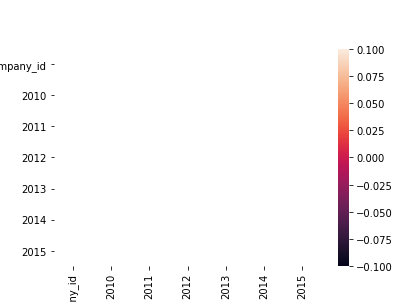

In [17]:
sns.heatmap(corr)

<AxesSubplot:xlabel='Companies With Data'>

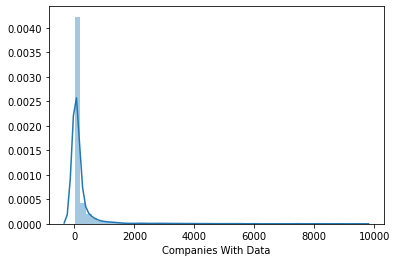

In [18]:
sns.distplot(indicators.iloc[:, 1])

In [32]:
top_indicators = indicators.sort_values(by="Companies With Data", axis=0, ascending=False).head(30)
top_indicators

,indicator_id,Companies With Data
4091,LiabilitiesAndStockholdersEquity,9469
3037,Assets,9460
4093,NetIncomeLoss,8926
7457,StockholdersEquity,8843
765,CashAndCashEquivalentsAtCarryingValue,8735
511,CashAndCashEquivalentsPeriodIncreaseDecrease,8412
11,RetainedEarningsAccumulatedDeficit,8374
1,CommonStockSharesAuthorized,8303
4108,NetCashProvidedByUsedInOperatingActivities,8192
2280,CommonStockValue,8093


In [34]:
someData = dw.query(dataset, "SELECT * FROM indicators_by_company LIMIT 10000").dataframe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'LiabilitiesAndStockholdersEquity'),
  Text(1, 0, 'Assets'),
  Text(2, 0, 'NetIncomeLoss'),
  Text(3, 0, 'StockholdersEquity'),
  Text(4, 0, 'CashAndCashEquivalentsAtCarryingValue'),
  Text(5, 0, 'CashAndCashEquivalentsPeriodIncreaseDecrease'),
  Text(6, 0, 'RetainedEarningsAccumulatedDeficit'),
  Text(7, 0, 'CommonStockSharesAuthorized'),
  Text(8, 0, 'NetCashProvidedByUsedInOperatingActivities'),
  Text(9, 0, 'CommonStockValue'),
  Text(10, 0, 'CommonStockSharesIssued'),
  Text(11, 0, 'NetCashProvidedByUsedInFinancingActivities'),
  Text(12, 0, 'CommonStockParOrStatedValuePerShare'),
  Text(13, 0, 'CommonStockSharesOutstanding'),
  Text(14, 0, 'Liabilities'),
  Text(15, 0, 'LiabilitiesCurrent'),
  Text(16, 0, 'AssetsCurrent'),
  Text(17, 0, 'PropertyPlantAndEquipmentNet'),
  Text(18, 0, 'NetCashProvidedByUsedInInvestingActivities'),
  

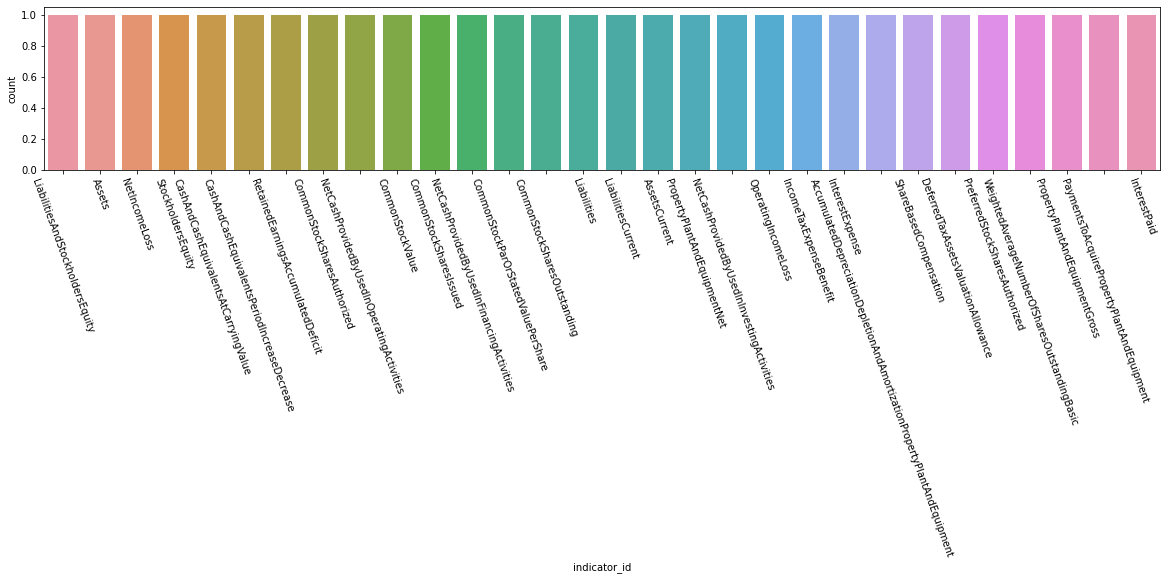

In [35]:
plt.figure(figsize=(20,3))
sns.countplot(x=, data=someData)
plt.xticks(rotation=-70)

In [6]:
dw.query(dataset, "SELECT * FROM companies_2 LIMIT 10").dataframe

,company_id,name_latest,names_previous
0,1000045,Nicholas Financial Inc,None
1,1000228,Henry Schein Inc,None
2,1000229,Core Laboratories N V,None
3,1000230,Optical Cable Corp,None
4,1000232,Kentucky Bancshares Inc /KY/,None
5,1000180,Sandisk Corp,None
6,1000209,Medallion Financial Corp,None
7,1000278,Pacifichealth Laboratories Inc,None
8,1000298,Impac Mortgage Holdings Inc,None
9,1000459,Green Energy Group Inc.,None
